# Exploratory Data Analysis Exercise
* For this part we will be using the `data/cars.csv` dataset

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline 
import scipy.stats as stats

# Load in the data
* Use the file in the data folder called 'cars.csv'
* Save it as a varible named 'df'
* Display the first 5 rows of our dataframe

In [137]:
# Load data
df = pd.read_csv("data/cars.csv")
df.head()


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


# Data clean up part 1.

1. Print the number of duplicate rows we have in our dataframe.

2. Modify our df to have all duplicate rows removed. 

3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.

In [138]:
# 1. Print the number of duplicate rows we have in our dataframe.
duplicates = df.duplicated()

duplicates.sum()


720

In [139]:
#  2. Modify our df to have all duplicate rows removed. 

print(df.shape, "before dropping duplicates")

df = df.drop_duplicates()

print(df.shape, "after dropping duplicates")

(11914, 15) before dropping duplicates
(11194, 15) after dropping duplicates


In [140]:
# 3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.

df.duplicated().sum()

0

# Data clean up part 2.
* Which column has the most null values and how many null values does it have?
* Print how long our dataframe is.
* Remove any row that has a null value in it. 
* Do a sanity check and pring how long our dataframe is now that we have removed our null values.

In [141]:
# * Which column has the most null values and how many null values does it have?

print(df.isna().sum().idxmax(), df.isna().sum().max(), sep="\n")

Engine HP
69


In [142]:
# * Print how long our dataframe is.
len(df)


11194

In [143]:
# * Remove any row that has a null value in it.
print(df.shape, "before removing rows with null values")

df = df.dropna()

(11194, 15) before removing rows with null values


In [144]:
# * Do a sanity check and pring how long our dataframe is now that we have removed our null values.
print(df.shape, "after removing rows with null values")


(11092, 15) after removing rows with null values


### Make a bar chart that displays how many times each brand of car appears in this data. 
_Brand of car is the `Make` of the car._
* You can achieve this by using value_counts or by a groupby.  Either is fine with me. 

<Axes: >

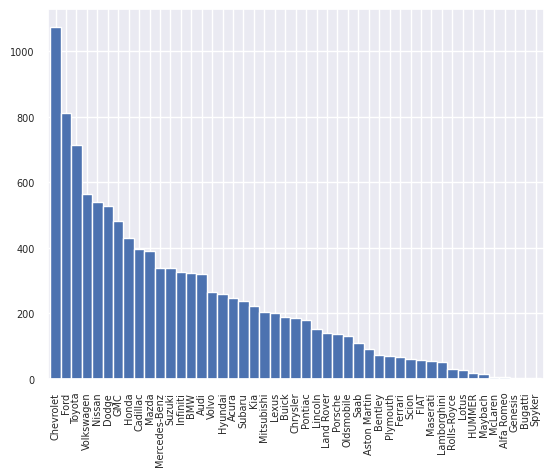

In [145]:
# Make a bar chart that displays how many times each brand of car appears in this data. 
df["Make"].value_counts().plot(kind="bar", fontsize=7, width=1)



# Make the cart more legible, by making it a horizontal bar chart and changing the figure size.  And also sort the values so the bar chart displays from lowest to highest.

<Axes: >

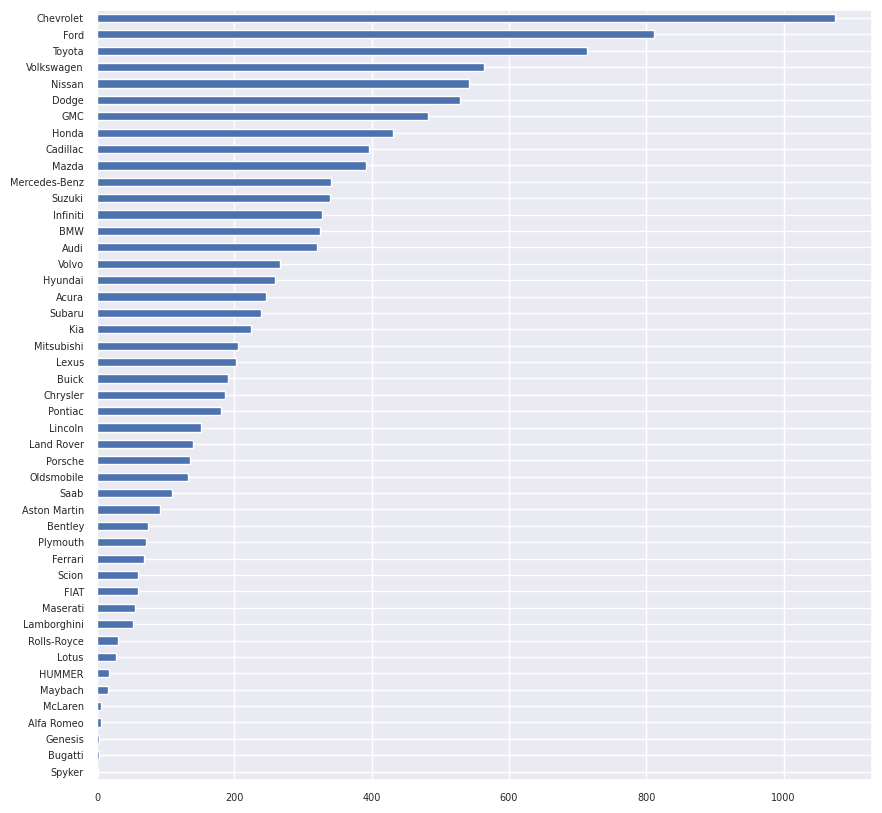

In [146]:
# Make the cart more legible, by making it a horizontal bar chart, sorting the values, and changing the figure size.
df["Make"].value_counts().sort_values().plot(kind="barh", fontsize=7, figsize=(10,10))



# Make a timeline line chart in which the x-axis is the Year, and the y-axis is the mean MSRP.
* you're going to have to do a `groupby` for this one for sure. 
* What's noticeable about it and what do you think the error is...


The MSRP has dramatically increased since 1990. An error is that there is no label for the y-axis.


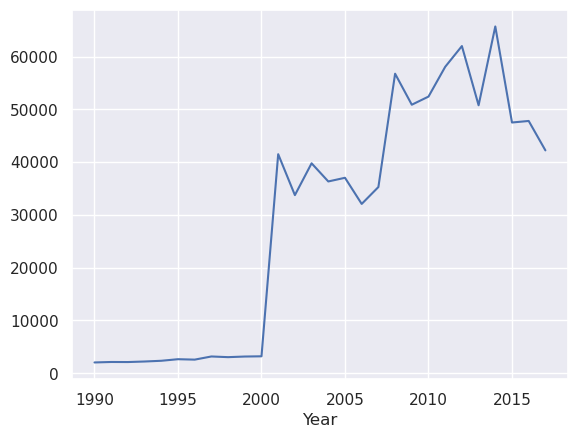

In [147]:
# Make a timeline line chart in which the x-axis is the year, and the y-axis is the average MSRP.
df.groupby("Year")["MSRP"].mean().plot()
print("The MSRP has dramatically increased since 1990. An error is that there is no label for the y-axis.")


# It seems as though in the years before (and includig) 2000, they were counting in tens.
Make a new column that is called `adjusted_price`, that contains all prices, however, for every year before 2000 make it 10x the original MSRP.  
   * Hint; you might need to use our old friend `np.where`

In [148]:
# Make a column where is 10 when year is less than 2000, else 1.
df["adjusted_price"] = np.where(df["Year"] <= 2000, df["MSRP"]*10, df["MSRP"]) 


# Multiply the MSRP by the price adjuster.



# Replot the new adjusted price.  
* Make the y-axis start at 0 and go up to 100,000

<Axes: xlabel='Year'>

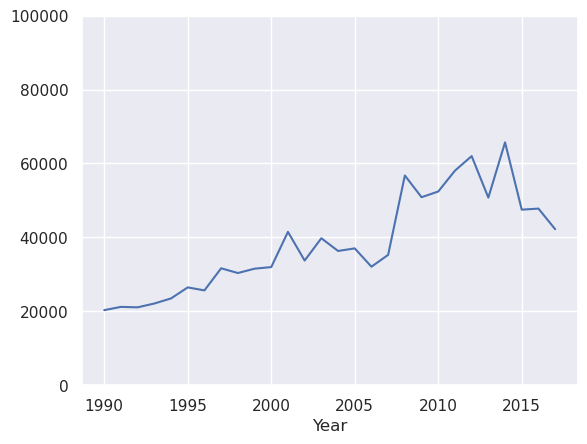

In [149]:
# Plot new prices
df.groupby("Year")["adjusted_price"].mean().plot(ylim=[0, 100000])



# Plot the relationship between Engine HP and highway MPG

<Axes: xlabel='Engine HP', ylabel='highway MPG'>

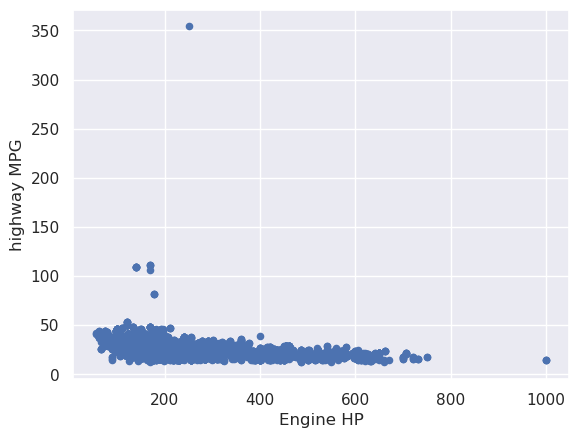

In [150]:
# Plot the relationship between Engine HP and highway MPG
df.plot.scatter("Engine HP", "highway MPG")

In [151]:
### IF WE DIDN'T GET TO REMOVING OUTLIERS IN CLASS, THEN YOU CAN SKIP THIS SECTION
# Remove any outliers from Engine HP and highway MPG
df["Engine HP"] = np.where(df["Engine HP"] > 800, np.NaN, df["Engine HP"])
df["highway MPG"] = np.where(df["highway MPG"] > 80, np.NaN, df["highway MPG"])

df = df.dropna()


# Replot the relationship between Engine HP and highway MPG


<Axes: xlabel='Engine HP', ylabel='highway MPG'>

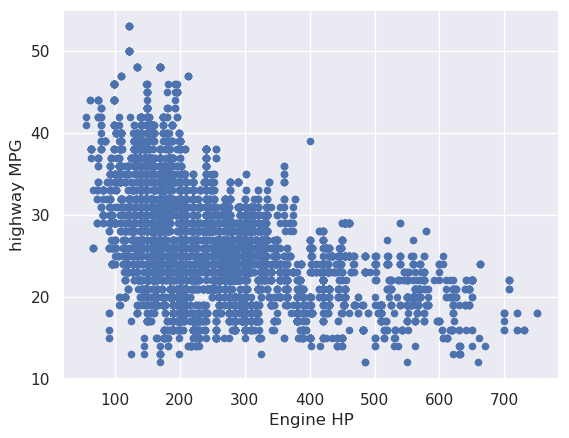

In [152]:
# Re-Plot the relationship between Engine HP and highway MPG
df.plot.scatter("Engine HP", "highway MPG")


# Make a scatter plot of Engine HP vs highway MPG

<Axes: xlabel='Engine HP', ylabel='highway MPG'>

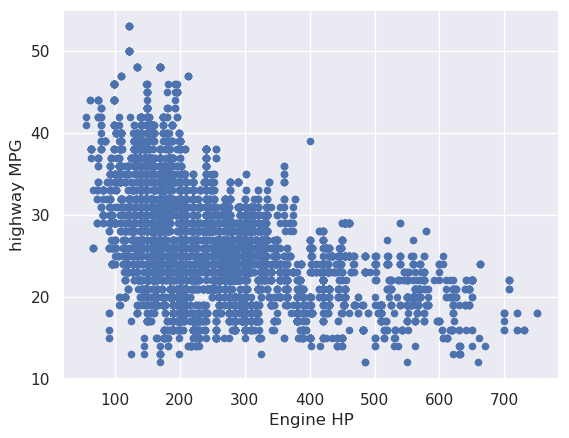

In [153]:
# Make a scatter plot of Engine HP vs highway MPG
df.plot.scatter("Engine HP", "highway MPG")


# What does this plot tell you about how Engine HP affects highway MPG?

In [154]:
# What does this plot tell you about how Engine HP affects highway MPG?

print('There is a negative correlation between Engine HP and highway MPG.')

There is a negative correlation between Engine HP and highway MPG.


# Using a pairplot, display all of the linear relationship.
* Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).

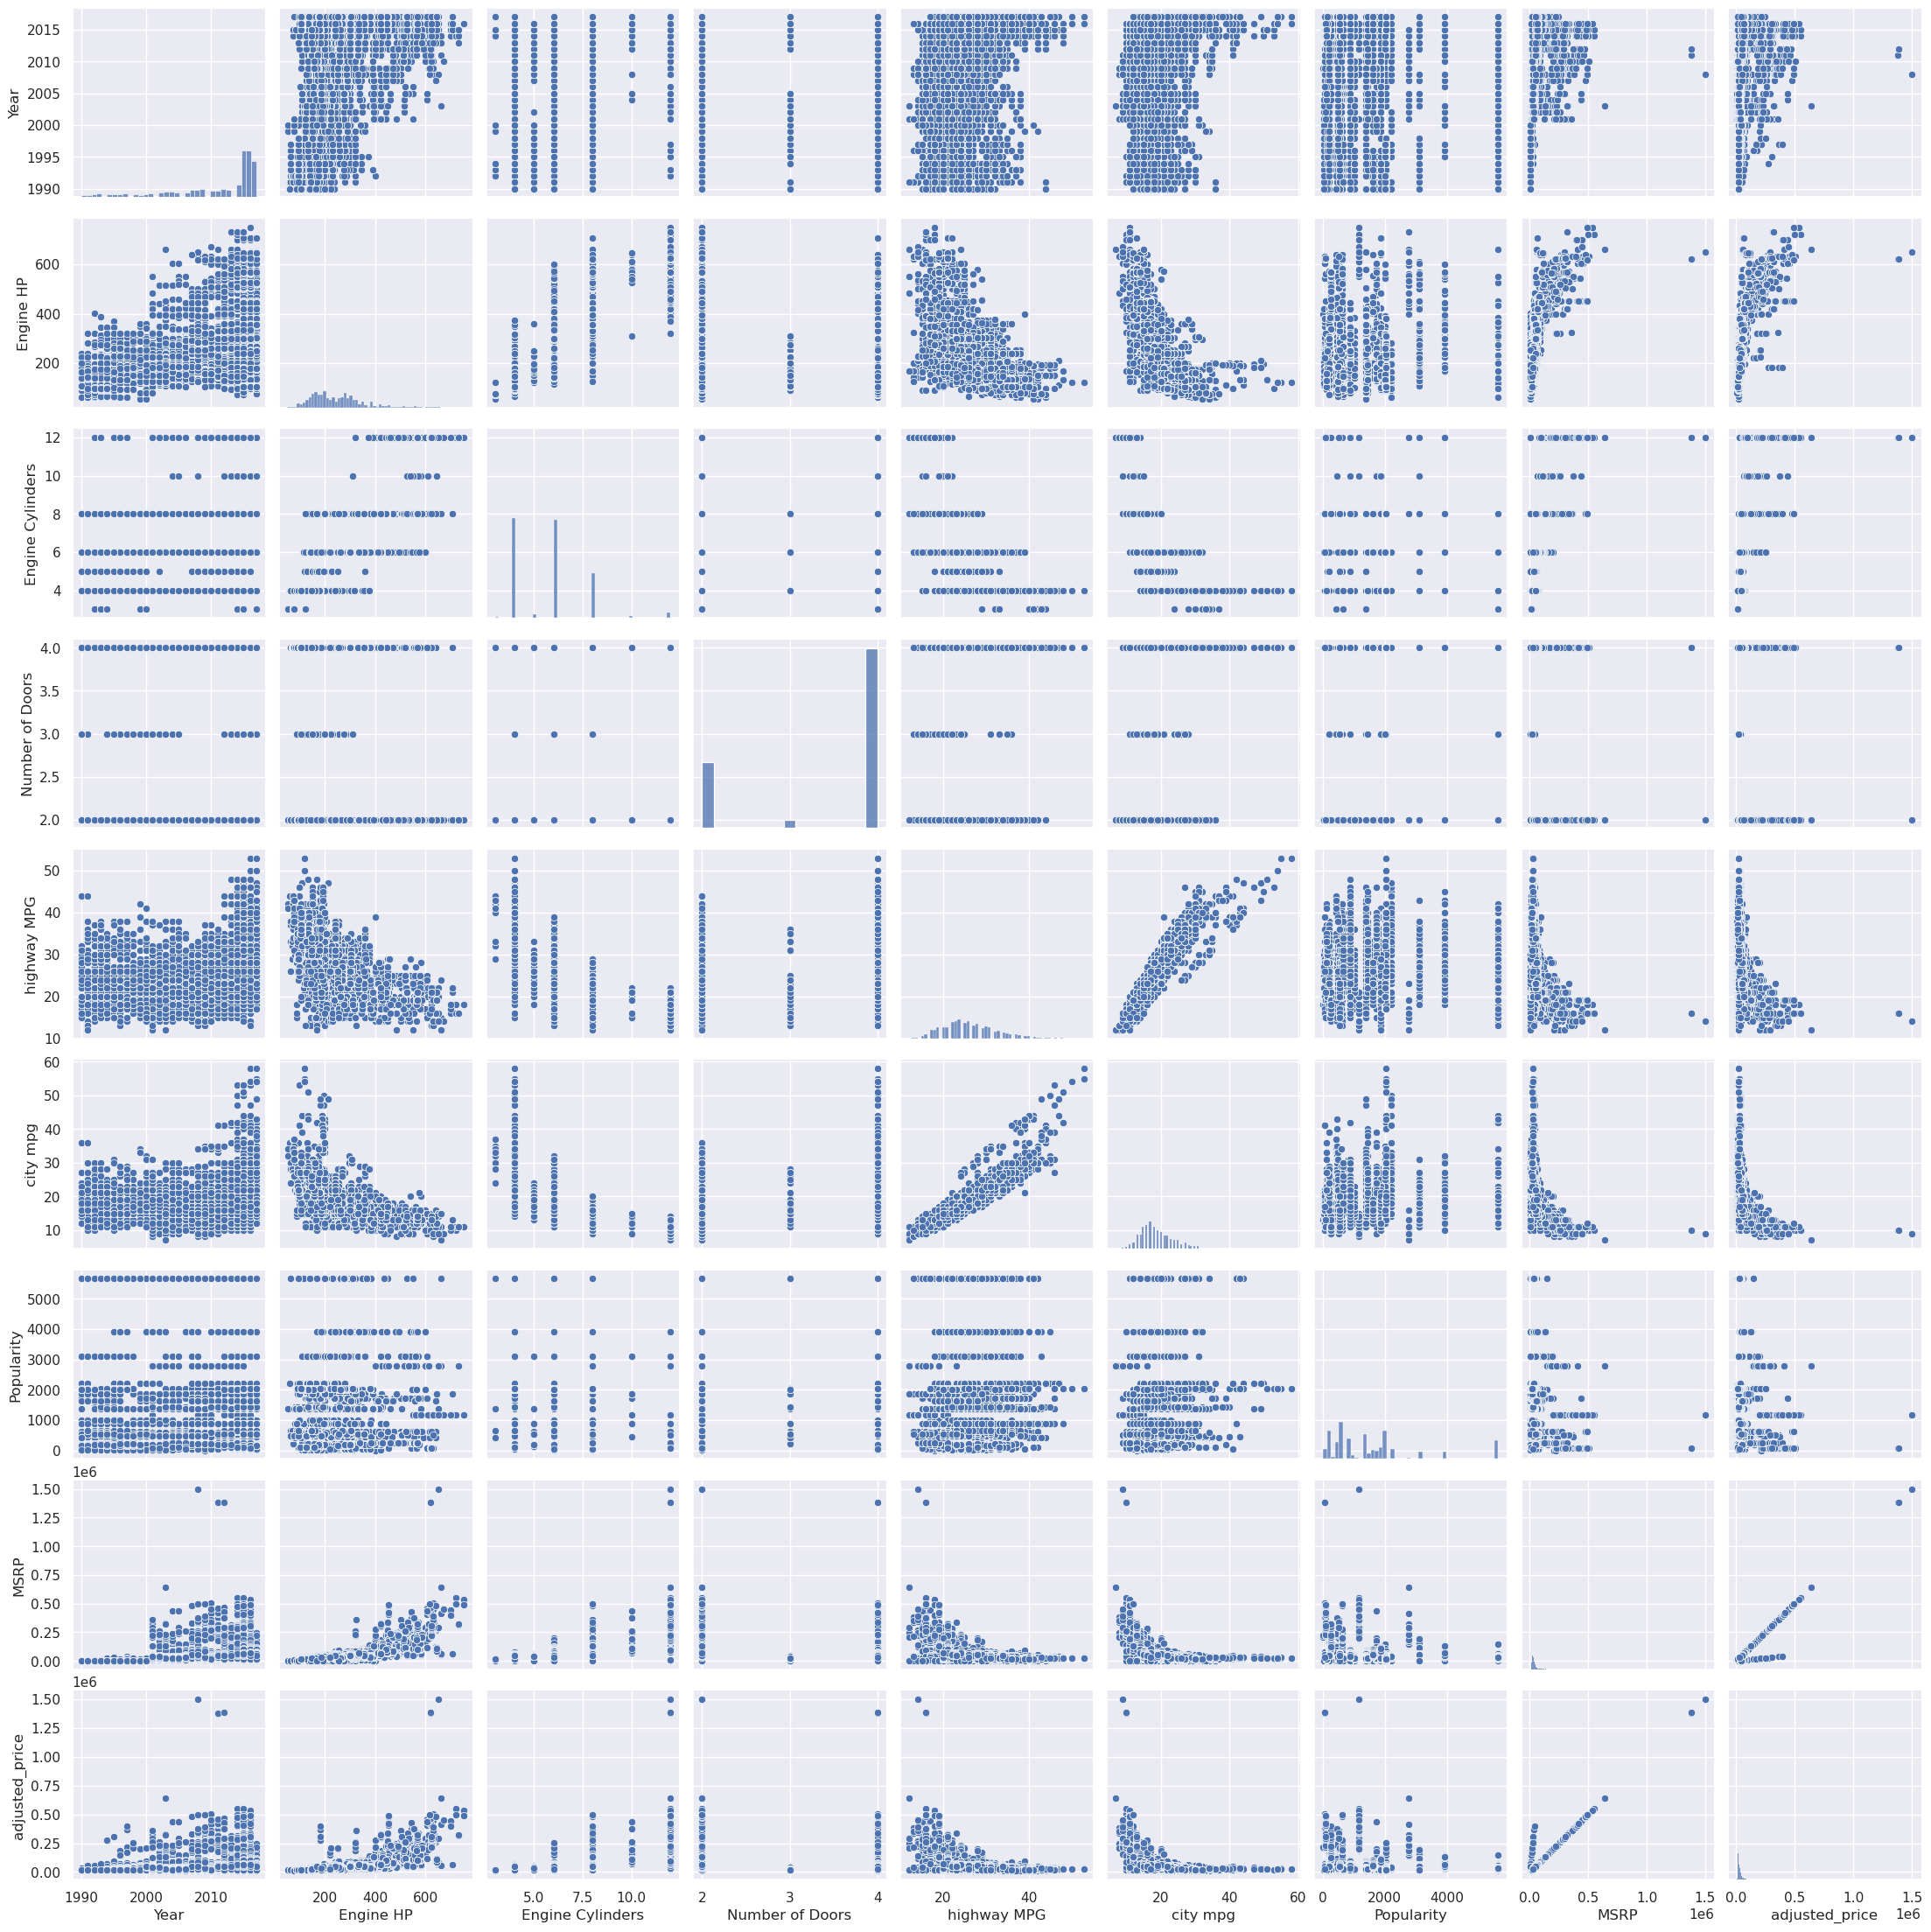

In [157]:
# Using a pairplot, display all of the linear relationship.
sns.pairplot(df)



In [158]:
# * Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).
print("city mpg and highway MPG")



city mpg and highway MPG


# Find which features actually have the strongest linear relationship using correlations.
* Make a heatmap plot of all of the correlations in our dataset.
* Change the figure size of our heatmap plot to be 8x8
* __Which feature does Engine HP have the strongest relationship with, and why do you think that relationship exists.__

/tmp/ipykernel_9807/1606834503.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),


<Axes: >

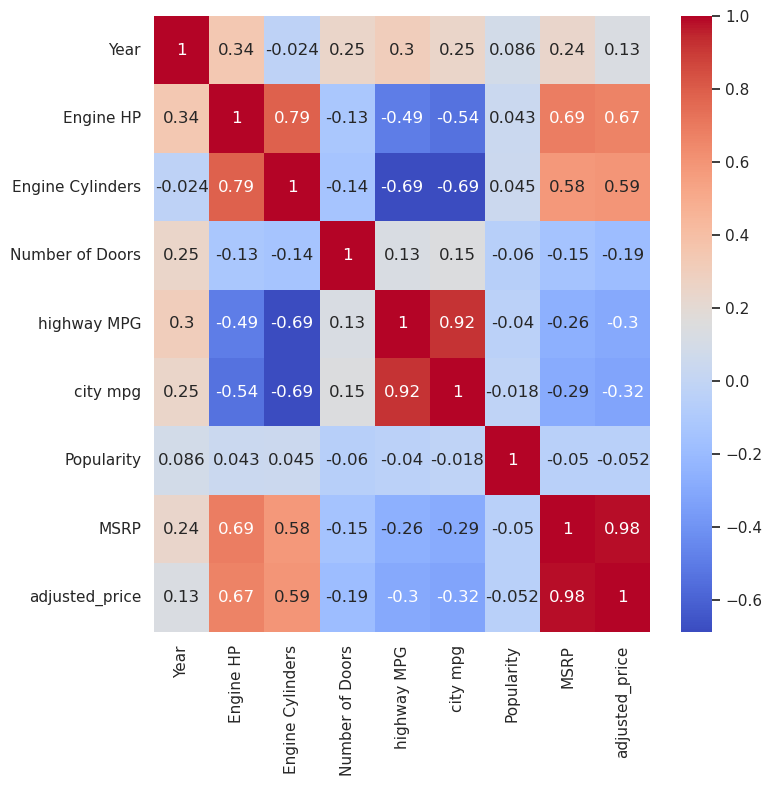

In [163]:
# * Make a heatmap plot of all of the correlations in our dataset.
# * Change the figure size of our heatmap plot to be 8x8

plt.figure(figsize=(8,8))

sns.heatmap(df.corr(),
           annot=True,
           cmap="coolwarm")




In [165]:
# Which feature does Engine HP have the strongest relationship with, and why do you think that relationship exists.

print('Engine HP has the strongest relationship with Engine Cylinders. I think that relationship exists because the more cylinders there are, the more powerful the engine is.')

Engine HP has the strongest relationship with Engine Cylinders. I think that relationship exists because the more cylinders there are, the more powerful the engine is.


# [EXTRA CREDIT] 
* (EASY) In the column names, replace all the spaces with an underscore, and make them all lowercase as well.

* (Easy) Learn more about cleaning data by following along in TA Georgios' tutorial in TA-Tips folder named `GI-Tips_1.ipynb`.

* (Medium) Do the same vizualizations using bokeh by following along in TA Stevens tutorial in the TA-Tips folder named `SS-Tips.ipynb`.


* (Medium) Learn how to remove outliers properly by following along in TA Georgios' tutorial in TA-Tips folder named `GI-Tips_2.ipynb`.

* (Variable) Complete one or more of the [Extra-Extra credit](https://docs.google.com/document/d/1D99fY13cF3kzIiJILZ3fwzhOF73z_xPBNxxweMpBkOY/edit) items. 


